<h3>Introduction</h3>

Spotify is one of the most popular music streaming service in the world. Songs of various styles and genres are published on the platform by both indie and professional artists from all over the world. As an asprirant artist who is intending to publish his/her song on the platform, one might be interested to predict how much popluarity the song is going to get based on its characteristics such tempo, key or loudness. In this analysis, we're going to look into a Spotify song dataset of 160,000 songs to explore the relationship between features of a song and its popularity. A predictive model will then be built to predict how well a song would do on Spotify based on the song's characteristics.

We're going to make a distinction between studio recorded track and live track. focus our analysis on studio recoded tracks only (live session recording shall not be considered)



<h3>Dataset</h3>

The dataset is named 'Spotify Dataset 1921-2020, 160k+ Tracks' and was published by user Yamac Eren Ay on Kaggle. Homepage of the dataset where details can be found is accessible <a href = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'>here</a>. 

It contains more than records of more than 160,000 songs and was collect using Spotify Web API. There are 19 columns in the dataset, description of each column is as follow:
<ul>
    <b>Primary:</b>
    <li><b style="color:Tomato;">id</b>: string value <br>Unique Spotify identifier for each song</p></li>
    <br>
    <b>Numerical:</b>
    <li><b style="color:Tomato;">acousticness</b>: float value ranges from 0 to 1</li>
    Confidence measure of whether the track is acousitc.
    <br>
    <li><b style="color:Tomato;">danceability</b>: float value ranges from 0 to 1</li>
    <br>
    <li><b style="color:Tomato;">energy</b>: float value ranges from 0 to 1</li>
    <br>
    <li>duration_ms: integer value, ~250,000 <br>The duration of the track in milliseconds</li>
    <br>
    <li>instrumentalness (Ranges from 0 to 1)</li>
    <br>
    <li>valence (Ranges from 0 to 1)</li>
    <br>
    <li>popularity (Ranges from 0 to 100)</li>
    <br>
    <li>tempo (Float typically ranging from 50 to 150)</li>
    <br>
    <li>liveness (Ranges from 0 to 1)</li>
    <br>
    <li>loudness (Float typically ranging from -60 to 0)</li>
    <br>
    <li>speechiness (Ranges from 0 to 1)</li>
    <br>
    <li>year (Ranges from 1921 to 2020)</li>
    <br>
    <b>Dummy:</b>
    <li>mode (0 = Minor, 1 = Major)</li>
    <br>
    <li>explicit (0 = No explicit content, 1 = Explicit content)</li>
    <br>
    <b>Categorical:</b>
    <li>key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)</li>
    <br>
    <li>artists (List of artists mentioned)</li>
    <br>
    <li>release_date (Date of release mostly in yyyy-mm-dd format, however precision of date          may vary)</li>
    <br>
    <li>name (Name of the song)</li>
</ul>

Let's take a look at an example record of the song "Radio Ga Ga" by "Queen". Value of 'key' field being 5 indicates that the song is in key F Major. One interesting feature of this song is 'valence' which the song has a score of 0.632. This tells us that the song is musically positive or, in another word, sounds cheerful and upbeat, which is really the case for the song "Radio Ga Ga". Another interesting metric of this song is the 'danceability' score, which it scores an impressive 0.752. This is again understandable since the song, with a simple and catchy beat, is easy to dance to.

It is important to note that these numerical metrics are given to each song using Spotify own model and aren't assigned human so we can assume that scores for different attributes of each song are given fairly consistently. In order to create a test case for a new song, it is important to run this song through Spotify model to get a set of values for features of interest rather than having someone artist to assign scores to the song.

The key data which describe the attributes of a song such as <b>danceability</b>, <b>acousticness</b>, <b>loudness</b>, ... are already in numerical format and are already normalized so that will help a lot in the data wrangling process. Data field such as 'artists' or 'name', though might very well have an impact on the popularity of a song, will not be used in this model since we only want to focus on the muscial virtues of a song.


In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

spot = pd.read_csv('data.csv')
spot.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [221]:
spot[spot['name']=='Radio Ga Ga']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
84438,0.151,['Queen'],0.752,348173,0.375,0,2jAc9KIQ9XoZxkydXh3MVh,0.000481,5,0.143,-12.966,1,Radio Ga Ga,52,1984-02-27,0.0358,112.415,0.632,1984


In [222]:
print(spot.shape)
print(spot.dtypes)

(169909, 19)
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object


In [223]:
spot.describe()
# no missing data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [224]:
spot.popularity.value_counts()
# there are 27357 tracks with 0 popularity score, let's investigate the reasons for this 0 rating
# keep in mind that popularity is calculated majorly using counts of listen and how recent those listens are

0      27357
42      3280
43      3120
40      3061
44      3054
       ...  
93         3
97         1
96         1
99         1
100        1
Name: popularity, Length: 100, dtype: int64

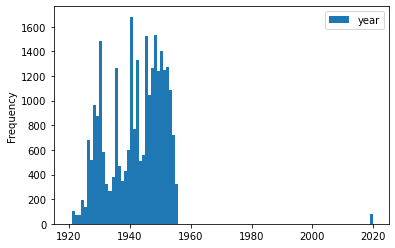

["['Tame Impala']" "['Morat']" "['Morat', 'Juanes']" "['Summer Walker']"
 "['Usher', 'Tyga']" "['Wisin & Yandel', 'Anthony Santos']"
 "['Wisin & Yandel', 'Chris Brown', 'T-Pain']" "['Wisin & Yandel']"
 "['Wisin & Yandel', 'Jennifer Lopez']" "['Arijit Singh']"
 "['Arijit Singh', 'Shadab Faridi']" "['Arijit Singh', 'Shreya Ghoshal']"
 "['Flo Rida']" "['Jack Johnson']" "['Ne-Yo']" "['Becky Hill']"
 "['Alejandro Fernández', 'Christina Aguilera']"
 "['Alejandro Fernández', 'Morat']" "['Luis Fonsi']"
 "['Luis Fonsi', 'Aleks Syntek', 'Noel Schajris', 'David Bisbal']"
 "['Luis Fonsi', 'Demi Lovato']" "['Stevie Wonder']" "['Dean Lewis']"
 "['Johann Sebastian Bach', 'Lucas Jussen', 'Arthur Jussen']"
 "['Marc Anthony']" "['Juanes']" "['Juanes', 'Nelly Furtado']"
 "['Alejandro Sanz']" "['Jax Jones', 'Ina Wroldsen']"
 "['Cali Y El Dandee', 'Sebastian Yatra']" "['Bryan Adams']"
 "['Dire Straits']"
 "['J Balvin', 'Yandel', 'Farruko', 'Nicky Jam', 'De La Ghetto', 'Daddy Yankee', 'Zion', 'Arcangel']"
 

In [225]:
spot_zero = spot[spot.popularity == 0]
bins = np.arange(1920, 2021, 1)
spot_zero.plot(kind='hist', y='year', bins=bins)
plt.show()
# It's clear that the majority of the 0-popularity tracks are tracks published before 1960
# these songs are probably too old for the current user base (largely millenials) to know about
# Therefore, these songs don't receive enough plays to get a popularity score. Some of these 
# songs might become more popular if somehow the user base decide to give all these old tracks
# a try, however there's no way to know for sure. Due to this uncertainty, it's best to drop these
# records because there is no relationship between popularity score and a track's attributes

print(spot[spot.popularity==0][spot.year==2020][['artists']].squeeze().unique())
# There's a small group of tracks published recently but also have a 0 popularity score
# A quick querry shows that these tracks are by relatively popular artists so the reason for 0 popularity score
# might be because these tracks were released too recently that they haven't got enough time to gather
# enough plays to get a score
# Same as above, we're going to drop these records. 

In [226]:
spot[spot.popularity == 0].index
spot.drop(index=spot[spot.popularity == 0].index, inplace=True)
# drop rows where popularity score = 0

In [227]:
spot.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,142552.000000,142552.000000,1.425520e+05,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000
mean,0.421372,0.546446,2.345441e+05,0.531999,0.086684,0.127020,5.203891,0.203019,-10.613328,0.709881,37.612605,0.078032,118.626089,0.536024,1984.035391
std,0.354563,0.173625,1.111261e+05,0.260818,0.281373,0.278055,3.519018,0.178617,5.347772,0.453819,18.094736,0.103235,30.357243,0.260744,21.783692
min,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.063200,0.430000,1.751050e+05,0.324000,0.000000,0.000000,2.000000,0.095500,-13.411000,0.000000,25.000000,0.034000,95.275000,0.327000,1967.000000
50%,0.356000,0.556000,2.161070e+05,0.541000,0.000000,0.000087,5.000000,0.131000,-9.733000,1.000000,38.000000,0.043400,116.164000,0.546000,1985.000000
75%,0.773000,0.672000,2.678032e+05,0.746000,0.000000,0.024600,8.000000,0.255000,-6.660750,1.000000,51.000000,0.070000,137.413000,0.753000,2002.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


In [228]:
# According to Spotify API documentation, 'liveness' is defined as detection level of the presence of audience
# Higher 'liveness' values indicate a higher probability that a certain track is a record of a live session.
# A 'liveness' score of above 0.8 presents a strong likelihood that a track is live.
# Since our model is meant to provide prediction for a studio recorded track, we're going to filter and discard
# tracks which are highly likely to be live records.

print((spot.liveness > 0.8).value_counts())
# There are about 3000 tracks in this dataset which are highly likely to be live records
spot.drop(index=spot[spot.liveness > 0.8].index, inplace=True)

False    139366
True       3186
Name: liveness, dtype: int64


In [229]:
# We're also not going to use 'liveness' as one of the predicting variables since it's not an attribute
# which an artist consciously control when creating a track. As far as we're concerned, 'liveness' helps to 
# classify whether a track is live or not and we're not concerned with how whether a track is live or not affects 
# its popularity on Spotify.

In [230]:
# speechiness above 0.66 is considered non-musical so therefore we're going to filter out those tracks as well
# unlike 'liveness', 'speechiness' does characterize a track rather than simply classify whether a track is a podcast/talkshow or a song
# For example, with 'speechiness' somewhere between 0.33 and 0.66 the song is most likely to be a rap song.
# We can see this score as a way to quantify how melodic a song is. Therefore, we're going to keep this column to use as a predicting variable
spot.drop(index=spot[spot.speechiness < 0.66].index, inplace=True)

In [231]:
# Now we're going to look into 'tempo' attribute
spot.tempo.describe()
# We can notice that there are tracks whose tempo is zero, let's list them out
spot[spot.tempo == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [232]:

# Interestingly, by actually search for the track on Spotify and listen to it, 
# we recognize that there are 2 groups of tracks whose tempo is zero
# The first group are tracks of noises or sounds such as 'white noise' or 'water sound', which people listen to to focus or relax 
# The second group comprises tracks which are actually songs for example with tempo but for some reasons, Spotify engine was unable to detect
# We assume these data entries are corrupted and going to remove from the dataset
spot.drop(index=spot[spot.tempo == 0].index, inplace=True)


In [233]:
# For the case of 0 energy score, there is one track which we can assume to be a sound test file named '65 Hz Test Tone'
# We're going to remove this entry as well
spot.drop(index=spot[spot.energy == 0].index, inplace=True)

In [234]:
# Rename 'duration_ms' column to 'duration'
spot.rename(columns={'duration_ms':'duration'}, inplace=True)
# We're going to drop colummns not related to the analysis such as 'artists', 'id', 'release_date' & 'name', ...
spot.drop(columns=['artists', 'id', 'release_date', 'name', 'liveness', 'year'], inplace=True)

In [235]:
spot.shape
# After cleaning the dataset we've arrived with a dataset having 12 features and 1 label column

(800, 13)

<AxesSubplot:ylabel='Correlation'>

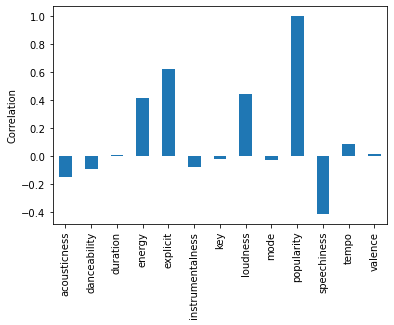

In [236]:
spot.corr().popularity.plot(kind='bar', ylabel='Correlation')

Strong correlation with loudness and explicity

Now we're going to create train and test set using train_test_split() function from sklearn

In [237]:
from sklearn.model_selection import train_test_split

X = spot.iloc[:, spot.columns != 'popularity'].to_numpy()
y = spot.popularity.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 12), (240, 12), (560,), (240,))

Let's now first try to build a prediction model based on a Multiple Linear Regression method

In [238]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

Evaluate model accuracy using test set, metrics for accuracy used here are Mean Squared Error (MSE) score and R2 score

In [239]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat, squared=False), r2_score(y_test, y_hat)

(10.985906807599665, 0.5493924751055925)

Relatively good score, on average a prediction of popularity score is 14 points off. A polynomial regeression model might be more suitable for the task

In [245]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_train_p, X_test_p = pf.fit_transform(X_train), pf.fit_transform(X_test)

lr.fit(X_train_p, y_train)
y_hat = lr.predict(X_test_p)


print(mean_squared_error(y_test, y_hat, squared=False), r2_score(y_test, y_hat))

16.11673152591289 0.030203613498430593


This model does not take into account the effect of the popularity of the artist or how a track is named. These 2 elements of a track could be a deciding factor as to whether a track can gain the intial traction to become more popular.